<h3 align="center"> Dask Experiments</h3> 

In [1]:
import os
import dask
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
from distributed.diagnostics import MemorySampler
import pandas as pd
import numpy as np
import glob
from dask_ml.preprocessing import Categorizer
clusters = LocalCluster(n_workers=14)
client = Client(clusters)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 14
Total threads: 28,Total memory: 62.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39369,Workers: 14
Dashboard: http://127.0.0.1:8787/status,Total threads: 28
Started: Just now,Total memory: 62.73 GiB
Comm: tcp://127.0.0.1:43763,Total threads: 2
Dashboard: http://127.0.0.1:44961/status,Memory: 4.48 GiB
Nanny: tcp://127.0.0.1:43715,


In [2]:
import dask.array as da
A = da.random.random((5_000, 5_000), chunks=(200, 200))
b = (A @ A.T).sum()

/home/vineeth/anaconda3/envs/nvtabular/lib/python3.7/site-packages/dask/array/routines.py:435: PerformanceWarning: Increasing number of chunks by factor of 25
  concatenate=False,


In [3]:
A

dask.array<random_sample, shape=(5000, 5000), dtype=float64, chunksize=(200, 200), chunktype=numpy.ndarray>

In [3]:
ms = MemorySampler()
with ms.sample("AMM off"):
    b.compute()

In [5]:
client.amm.start()
client.amm.running()

True

In [6]:
# ms = MemorySampler()
with ms.sample("AMM on"):
    b.compute()

In [8]:
import ctypes
def trim_memory() -> int:
     libc = ctypes.CDLL("libc.so.6")
     return libc.malloc_trim(0)
client.run(trim_memory)

{'tcp://127.0.0.1:33877': 1,
 'tcp://127.0.0.1:34453': 1,
 'tcp://127.0.0.1:35307': 1,
 'tcp://127.0.0.1:35893': 1,
 'tcp://127.0.0.1:36703': 1,
 'tcp://127.0.0.1:38225': 1,
 'tcp://127.0.0.1:38227': 1,
 'tcp://127.0.0.1:39729': 1,
 'tcp://127.0.0.1:39747': 1,
 'tcp://127.0.0.1:40783': 1,
 'tcp://127.0.0.1:41161': 1,
 'tcp://127.0.0.1:42619': 1,
 'tcp://127.0.0.1:43763': 1,
 'tcp://127.0.0.1:46777': 1}

In [5]:
client.amm.stop()
client.amm.running()

False

<AxesSubplot:xlabel='time', ylabel='Cluster memory (GiB)'>

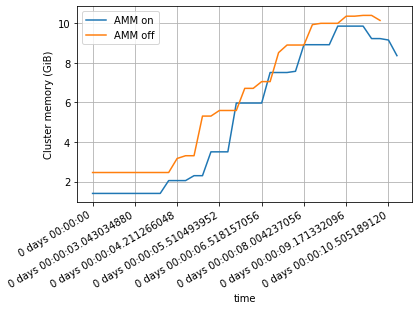

In [8]:
ms.plot(align=True, grid=True)

<AxesSubplot:xlabel='time', ylabel='Cluster memory (GiB)'>

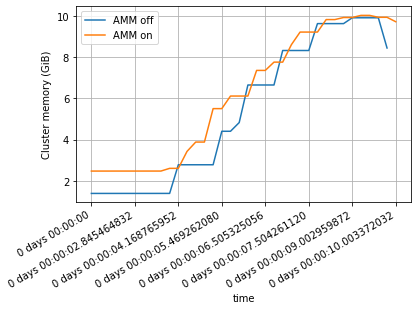

In [9]:
ms.plot(align=True, grid=True)

In [8]:
client.close()

In [13]:
files = glob.glob('/home/vineeth/Downloads/archive/Active Wiretap/Active_Wiretap_dataset.csv')

In [24]:
column_names= ['feature{}'.format(i) for i in range(115)]
ddf = dd.read_csv(files[0], names=column_names, header=None)

In [27]:
mx_vals = ddf.max(axis=0).compute().to_frame(name="max_val")
min_vals = ddf.min(axis=0).compute().to_frame(name="min_val")
ddf_max_mins = pd.concat([min_vals, mx_vals], axis=1)

In [28]:
ddf_max_mins

,min_val,max_val
feature0,1.000000,536.480837
feature1,60.000000,1514.000000
feature2,0.000000,528527.591706
feature3,1.000000,803.560657
feature4,60.000000,1514.000000
...,...,...
feature110,0.000000,699.170586
feature111,60.000000,1420.155680
feature112,0.000000,488839.508225
feature113,-33131.503839,23736.756272


In [71]:
series = ddf_int.memory_usage_per_partition(deep=True).compute()

In [70]:
ddf_int = ddf.astype(np.int16)

In [72]:
import dask
dask.utils.format_bytes(series.sum())

'499.83 MiB'

In [30]:
header_list = ["node1", "node2", "weight"]
ddf = dd.read_csv(files[0], delimiter=r"\s+", blocksize='100mb', names=header_list)
ddf.head(10)

,node1,node2,weight
0,0,137,1.0
1,0,206,1.0
2,0,243,1.0
3,0,954,1.0
4,0,974,1.0
5,0,1552,1.0
6,0,1586,1.0
7,0,1839,1.0
8,0,1903,1.0
9,0,2137,1.0


In [41]:
ddf.groupby("node1").agg(list).compute()

,node2,weight
node1,,
0,"[137, 206, 243, 954, 974, 1552, 1586, 1839, 19...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,"[805, 823, 824, 992, 1309, 1462, 2083, 2788, 2...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,"[428, 3473]","[1.0, 1.0]"
3,"[529, 898, 3757]","[1.0, 1.0, 1.0]"
4,"[4, 10, 137, 488, 532, 823, 880, 881, 882, 104...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...
3863,[3863],[1.0]
3868,[3868],[1.0]
3872,"[3872, 3874]","[1.0, 1.0]"


In [2]:
pth = os.path.join('/media/vineeth/6TB_Volume/DataRepo/ecommerce_behavior_data/2019-Dec.csv')
ddf = dd.read_csv(pth, blocksize='100mb')

In [4]:
ddf

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
npartitions=94,,,,,,,,,
,object,object,int64,int64,object,object,float64,int64,object
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [5]:
ddf.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [6]:
ddf.isnull().sum().compute()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    7088848
brand            8122410
price                  0
user_id                0
user_session          21
dtype: int64

In [19]:
ddf.unique().compute()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
npartitions=94,,,,,,,,,
,object,object,int64,int64,object,object,float64,int64,object
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [7]:
ddf['user_session']

67542878

In [10]:
client.close()

<h2 align="center"> Dask Experiments </h2>

In [28]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
# df_b = df_b.astype({'first_name':'category', 'last_name':'category'})
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [5]:
df_b['first_name_new'] = df_b['first_name'].factorize()[0]
df_b

,subject_id,first_name,last_name,first_name_new
0,4,Billy,Bonder,0
1,5,Brian,Black,1
2,6,Bran,Balwner,2
3,7,Bryce,Brice,3
4,8,Betty,Btisan,4


In [29]:
ddf_b = dd.from_pandas(df_b, npartitions=1)
ddf_b = ddf_b.astype({'first_name':'category', 'last_name':'category'})
ddf_b

,subject_id,first_name,last_name
npartitions=1,,,
0,object,category[unknown],category[unknown]
4,...,...,...


In [17]:
df_b["last_name_cat_codes"] = df_b["first_name"].cat.codes
df_b

,subject_id,first_name,last_name,last_name_cat_codes
0,4,Billy,Bonder,1
1,5,Brian,Black,3
2,6,Bran,Balwner,2
3,7,Bryce,Brice,4
4,8,Betty,Btisan,0


In [30]:
ddf_b["first_name"] = ddf_b["first_name"].cat.as_known()

In [31]:
ddf_b

,subject_id,first_name,last_name
npartitions=1,,,
0,object,category[known],category[unknown]
4,...,...,...


In [33]:
ddf_b = ddf_b.assign(first_name_cat_codes=(ddf_b["first_name"].cat.codes))
ddf_b.head()

,subject_id,first_name,last_name,first_name_cat_codes
0,4,Billy,Bonder,1
1,5,Brian,Black,3
2,6,Bran,Balwner,2
3,7,Bryce,Brice,4
4,8,Betty,Btisan,0
